<a href="https://colab.research.google.com/github/pcsilcan/da/blob/master/week10/FrequentItemsetsCondensed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyfim

     |████████████████████████████████| 358kB 8.4MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp36-cp36m-linux_x86_64.whl size=536916 sha256=8ebc229377e174b28aba1c2a345f89eecb8bae035459fe03175fd2b37d276013
  Stored in directory: /root/.cache/pip/wheels/19/ac/b4/9ae8ceb2208d78b21b1157f8561cc4469d236b7d785e7422f1
Successfully built pyfim


In [0]:
# !pip install seaborn

In [6]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import time
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
help(eclat)

Help on built-in function eclat in module fim:

eclat(...)
    eclat (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
           eval='x', agg='x', thresh=10, prune=None, algo='a', mode='',
           border=None)
    Find frequent item sets with the Eclat algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an item set     

In [0]:
def leerDataset(nombre):
    archivo = open(nombre, 'r')
    dataset = []
    dataset1 = []
    for x in archivo:
        if "#" not in x:
            items = x.split(' ')
            dataset += [[int(j) for j in items[1:]]]
            if items[0] == '1':
                dataset1 += [[int(j) for j in items[1:]]]
    archivo.close()
    return dataset, dataset1

In [0]:
d, _ = leerDataset('zoo.bin')

In [0]:
def allPatterns(d, minsupp):
    s = eclat(d, target='a', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ['Pattern', 'Freq']
        return True, df

    return False, _

In [0]:
def plotAllPatterns(f):
    numberdata = []
    d, _ = leerDataset(f)
    k = int(len(d) / 20)
    for i in range(k, len(d), k):
        start = time.time()
        r, t = allPatterns(d, i)
        end = time.time()
        if r:
            numberdata += [(i, t.shape[0], end - start)]
    df = pd.DataFrame(numberdata)
    df.columns = ['Threshold', 'AllItemsets', 'TimeAllItemsets']
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x='Threshold', y='AllItemsets', ax=ax[0], data=df)
    sns.lineplot(x='Threshold', y='TimeAllItemsets', ax=ax[1], data=df)
    fig.show()

    return df

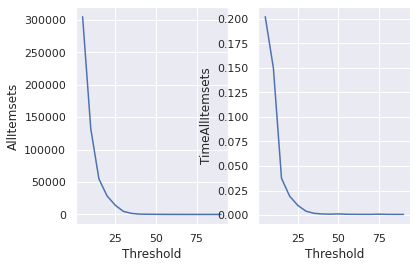

In [21]:
dfAFI = plotAllPatterns('zoo.bin')